In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

from sklearn import set_config
set_config(print_changed_only=False)


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score,f1_score,accuracy_score

In [102]:
df = pd.read_csv('insurance_clean2.csv',index_col=0)

In [103]:
pd.set_option('display.max_columns', 500)

In [104]:
df.head()

Age  Marital  Education  Default  Balance  HHInsurance  CarLoan  \
0   32        0          3        0        0            1        0   
1   32        1          2        0        0            1        0   
2   29        0          3        0        0            1        0   
3   25        0          2        0        0            1        0   
4   30        1          3        0        1            0        0   

   Communication  LastContactDay LastContactMonth  NoOfContacts  PrevAttempts  \
0              0              28              jan             2             0   
1              1              26              may             5             0   
2              1               3              jun             1             1   
3              1              11              may             2             0   
4              1               3              jun             1             0   

   Outcome  CarInsurance  Duration  age_group  duration_status  Month  \
0        0             0      70.0          1                0      1   
1        0             0     185.0          1                0      5   
2        0             1     340.0          0                0      6   
3        0             1     819.0          0                1      5   
4        0             0     192.0          0                0      6   

   Job_None  Job_admin.  Job_blue-collar  Job_entrepreneur  Job_housemaid  \
0         0           0                0                 0              0   
1         0           0                1                 0              0   
2         0           0                0                 0              0   
3         0           0                0                 0              0   
4         0           0                0                 0              0   

   Job_management  Job_retired  Job_self-employed  Job_services  Job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               1            0                  0             0            0   
3               0            0                  0             0            1   
4               1            0                  0             0            0   

   Job_technician  Job_unemployed  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0

In [105]:
df.drop('Duration',axis=1,inplace=True)

In [106]:
df.head()

Age  Marital  Education  Default  Balance  HHInsurance  CarLoan  \
0   32        0          3        0        0            1        0   
1   32        1          2        0        0            1        0   
2   29        0          3        0        0            1        0   
3   25        0          2        0        0            1        0   
4   30        1          3        0        1            0        0   

   Communication  LastContactDay LastContactMonth  NoOfContacts  PrevAttempts  \
0              0              28              jan             2             0   
1              1              26              may             5             0   
2              1               3              jun             1             1   
3              1              11              may             2             0   
4              1               3              jun             1             0   

   Outcome  CarInsurance  age_group  duration_status  Month  Job_None  \
0        0             0          1                0      1         0   
1        0             0          1                0      5         0   
2        0             1          0                0      6         0   
3        0             1          0                1      5         0   
4        0             0          0                0      6         0   

   Job_admin.  Job_blue-collar  Job_entrepreneur  Job_housemaid  \
0           0                0                 0              0   
1           0                1                 0              0   
2           0                0                 0              0   
3           0                0                 0              0   
4           0                0                 0              0   

   Job_management  Job_retired  Job_self-employed  Job_services  Job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               1            0                  0             0            0   
3               0            0                  0             0            1   
4               1            0                  0             0            0   

   Job_technician  Job_unemployed  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0

In [107]:
df.isnull().sum()

Age                  0
Marital              0
Education            0
Default              0
Balance              0
HHInsurance          0
CarLoan              0
Communication        0
LastContactDay       0
LastContactMonth     0
NoOfContacts         0
PrevAttempts         0
Outcome              0
CarInsurance         0
age_group            0
duration_status      0
Month                0
Job_None             0
Job_admin.           0
Job_blue-collar      0
Job_entrepreneur     0
Job_housemaid        0
Job_management       0
Job_retired          0
Job_self-employed    0
Job_services         0
Job_student          0
Job_technician       0
Job_unemployed       0
dtype: int64

In [83]:
df.age_group.unique()

array([ 1.,  0.,  2.,  4.,  3., nan])

In [115]:
df.head()

Age  Marital  Education  Default  Balance  HHInsurance  CarLoan  \
0   32        0          3        0        0            1        0   
1   32        1          2        0        0            1        0   
2   29        0          3        0        0            1        0   
3   25        0          2        0        0            1        0   
4   30        1          3        0        1            0        0   

   Communication  LastContactDay LastContactMonth  NoOfContacts  PrevAttempts  \
0              0              28              jan             2             0   
1              1              26              may             5             0   
2              1               3              jun             1             1   
3              1              11              may             2             0   
4              1               3              jun             1             0   

   Outcome  CarInsurance  age_group  duration_status  Month  Job_None  \
0        0             0          1                0      1         0   
1        0             0          1                0      5         0   
2        0             1          0                0      6         0   
3        0             1          0                1      5         0   
4        0             0          0                0      6         0   

   Job_admin.  Job_blue-collar  Job_entrepreneur  Job_housemaid  \
0           0                0                 0              0   
1           0                1                 0              0   
2           0                0                 0              0   
3           0                0                 0              0   
4           0                0                 0              0   

   Job_management  Job_retired  Job_self-employed  Job_services  Job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               1            0                  0             0            0   
3               0            0                  0             0            1   
4               1            0                  0             0            0   

   Job_technician  Job_unemployed  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0

<AxesSubplot:>

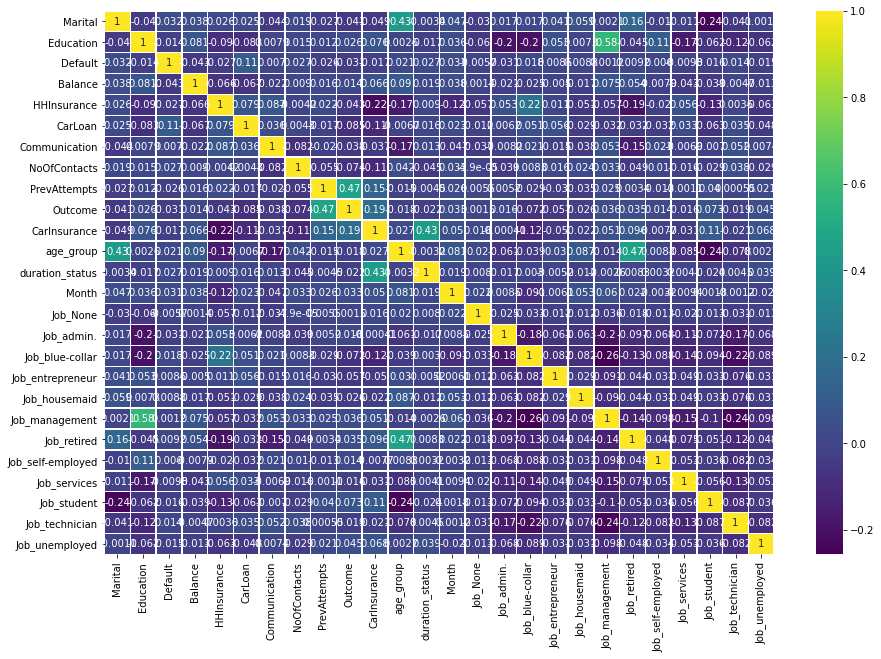

In [78]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr,cmap = 'viridis', annot= True, linewidth = 0.5)

In [57]:
num_top10_corr = df.corr()['CarInsurance'].sort_values(ascending=False).head(20).to_frame()
cm = sns.light_palette("blue", as_cmap=True)
s = num_top10_corr.style.background_gradient(cmap=cm)
s

In [27]:
## SPLITTING

In [117]:
df.drop(['Age','LastContactDay','LastContactMonth','LastContactDay'],axis=1,inplace=True)

In [128]:
X= df.drop(['CarInsurance'],axis=1)
y= df['CarInsurance']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify = y)

In [130]:
X_train.shape,X_test.shape

((2580, 25), (646, 25))

# LOGISTIC REGRESSION

In [131]:
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)
LR_train_pred = LR_model.predict(X_train)
LR_test_pred = LR_model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train,LR_train_pred)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,LR_test_pred)*100))

Train Set Accuracy:75.3875968992248
Test Set Accuracy:74.14860681114551


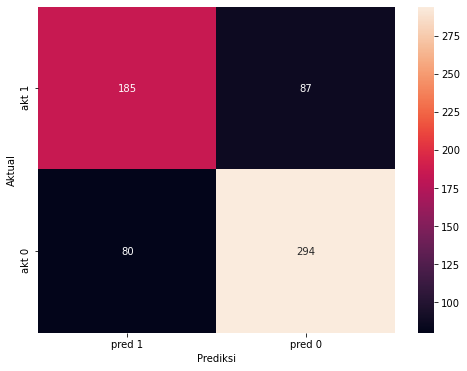

In [187]:
cm_LR = confusion_matrix(y_test, LR_test_pred, labels=[1,0])
df_LR = pd.DataFrame(data=cm_LR, index=['akt 1', 'akt 0'], columns=['pred 1', 'pred 0'])
sns.heatmap(df_LR, annot=True, fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

- FN 87 dan FP 80
- FP Machine predicted customer do not want to  buy the actual is want to buy
- FN Machine predicted customer want to  buy the actual is do not want to buy

# RANDOM FOREST Classifier BASE

In [188]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
RF_train_pred = RF_model.predict(X_train)
RF_test_pred = RF_model.predict(X_test)
RF_cm = confusion_matrix(y_test, RF_test_pred)


print("Train Set Accuracy:"+str(accuracy_score(y_train,RF_train_pred)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,RF_test_pred)*100))
print(classification_report(y_test, RF_test_pred))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test,RF_test_pred))

Train Set Accuracy:98.91472868217053
Test Set Accuracy:77.24458204334366
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       374
           1       0.71      0.77      0.74       272

    accuracy                           0.77       646
   macro avg       0.77      0.77      0.77       646
weighted avg       0.78      0.77      0.77       646


Confusion Matrix:
[[290  84]
 [ 63 209]]


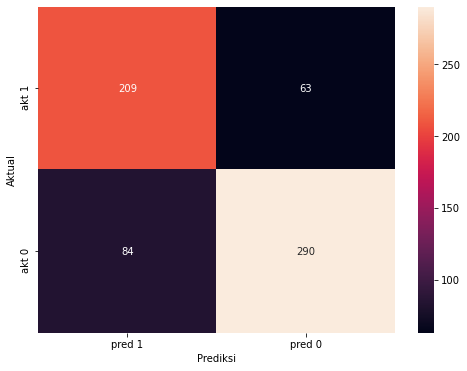

In [189]:
cm_RF = confusion_matrix(y_test, RF_test_pred, labels=[1,0])
df_RF = pd.DataFrame(data=cm_RF, index=['akt 1', 'akt 0'], columns=['pred 1', 'pred 0'])
sns.heatmap(df_RF, annot=True, fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

- FN 63 dan FP 84
- FP Machine predicted customer do not want to  buy the actual is want to buy
- FN Machine predicted customer want to  buy the actual is do not want to buy

# XGB Classsifier

In [190]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train,y_train)
XGB_train_pred = XGB_model.predict(X_train)
XGB_test_pred = XGB_model.predict(X_test)
XGB_cm = confusion_matrix(y_test, XGB_test_pred)


print("Train Set Accuracy:"+str(accuracy_score(y_train,XGB_train_pred)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,XGB_test_pred)*100))
print(classification_report(y_test, XGB_test_pred))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test,XGB_test_pred))

Train Set Accuracy:81.86046511627907
Test Set Accuracy:77.55417956656346
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       374
           1       0.71      0.80      0.75       272

    accuracy                           0.78       646
   macro avg       0.77      0.78      0.77       646
weighted avg       0.78      0.78      0.78       646


Confusion Matrix:
[[283  91]
 [ 54 218]]


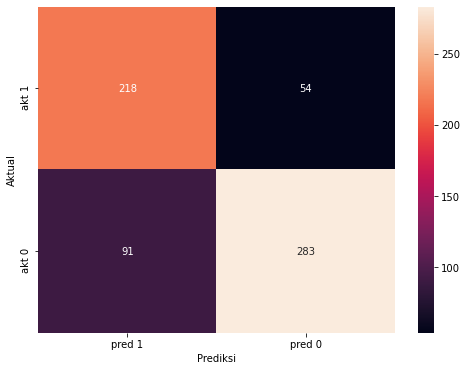

In [191]:
cm_XGB = confusion_matrix(y_test, XGB_test_pred, labels=[1,0])
df_XGB = pd.DataFrame(data=cm_XGB, index=['akt 1', 'akt 0'], columns=['pred 1', 'pred 0'])
sns.heatmap(df_XGB, annot=True, fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

- FN 54 dan FP 91
- FP Machine predicted customer do not want to  buy the actual is want to buy
- FN Machine predicted customer want to  buy the actual is do not want to buy

# HYPER PARAMETER TUNING

## LOGISTIC REGRESSION

In [144]:
LR = LogisticRegression()

In [145]:
param_LR = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'max_iter': [100,200,1000],
            'C': [1],
            'tol': [0.0001,0.0005]
           }

In [146]:
Tune_LR = GridSearchCV(LR, param_grid=param_LR, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
Tune_LR.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    8.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1], 'max_iter': [100, 200, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tol': [0.0001, 0.0005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [149]:
Tune_LR.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001}

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       374
           1       0.70      0.68      0.69       272

    accuracy                           0.74       646
   macro avg       0.73      0.73      0.73       646
weighted avg       0.74      0.74      0.74       646



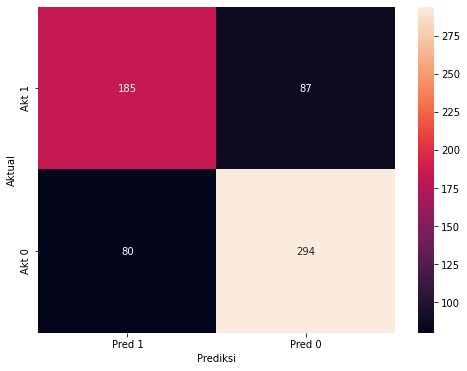

In [164]:
model_Tune_LR = Tune_LR.best_estimator_
y_tuned_lr = model_Tune_LR.predict(X_test)
cm_tuned_lr = confusion_matrix(y_test, y_tuned_lr, labels=[1,0])
df_tuned_lr = pd.DataFrame(data=cm_tuned_lr, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_tune_lr));
sns.heatmap(df_tune_lr, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

## Random Forest  Tuning


In [151]:
RF_tuned = RandomForestClassifier()
param_RF = {'n_estimators': [100,2000,5000],
            'max_depth': [None,5,7,8],
            'min_samples_split': [2,10,20],
            'max_features': ['auto',5],
           }

In [155]:
model_RF = RandomizedSearchCV(RF_tuned, param_distributions=param_RF, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
model_RF.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [166]:
model_RF.best_params_

{'n_estimators': 2000,
 'min_samples_split': 20,
 'max_features': 'auto',
 'max_depth': 8}

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       374
           1       0.72      0.79      0.76       272

    accuracy                           0.78       646
   macro avg       0.78      0.79      0.78       646
weighted avg       0.79      0.78      0.79       646



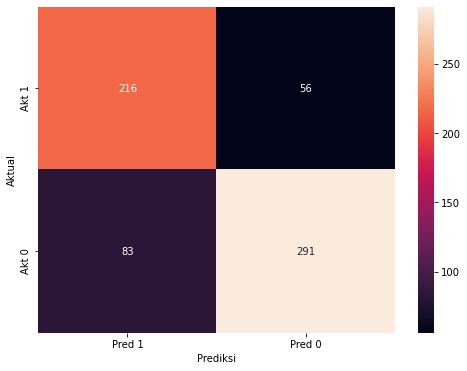

In [167]:
model_tuned_RF = model_RF.best_estimator_
y_tune_rf = model_tuned_RF.predict(X_test)
cm_tune_rf = confusion_matrix(y_test, y_tune_rf, labels=[1,0])
df_tune_rf = pd.DataFrame(data=cm_tune_rf, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_tune_rf));
sns.heatmap(df_tune_rf, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

In [168]:
y_tune_rf_train = model_tuned_RF.predict(X_train)
print(accuracy_score(y_train, y_tune_rf_train))
print(accuracy_score(y_test, y_tune_rf))

0.8147286821705426
0.7848297213622291


## XGBClassifier Tuning

In [170]:
XGB_Tuned = XGBClassifier()
param_xgb = {'max_depth': [6,1],
             'learning_rate': [0.300000012,0.600000012] , 
             'n_estimators': [1000], 
             'gamma': [0,.5], 
             'colsample_bytree': [1,0.5],
             'subsample': [1], 
             'reg_alpha':[0,0.5] ,
             'reg_lambda': [1,0.8]}

In [171]:
model_XGB = RandomizedSearchCV(XGB_Tuned, param_distributions=param_xgb, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
model_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [

In [172]:
model_XGB.best_params_

{'subsample': 1,
 'reg_lambda': 1,
 'reg_alpha': 0.5,
 'n_estimators': 1000,
 'max_depth': 6,
 'learning_rate': 0.600000012,
 'gamma': 0.5,
 'colsample_bytree': 1}

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       374
           1       0.71      0.76      0.73       272

    accuracy                           0.77       646
   macro avg       0.76      0.77      0.76       646
weighted avg       0.77      0.77      0.77       646



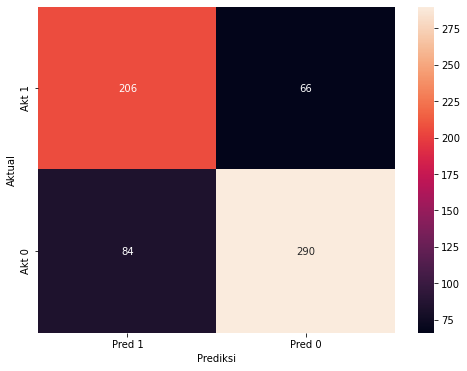

In [173]:
model_tuned_XGB = model_XGB.best_estimator_
y_tune_xgb = model_tuned_XGB.predict(X_test)
cm_tune_xgb = confusion_matrix(y_test, y_tune_xgb, labels=[1,0])
df_tune_xgb = pd.DataFrame(data=cm_tune_xgb, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_tune_xgb));
sns.heatmap(df_tune_xgb, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

In [174]:
y_tune_xgb_train = model_tuned_XGB.predict(X_train)
print(accuracy_score(y_train, y_tune_xgb_train))
print(accuracy_score(y_test, y_tune_xgb))

0.9205426356589147
0.7678018575851393


In [176]:
LRbase = recall_score(y_test, LR_test_pred)
RF_base = recall_score(y_test, RF_test_pred)
XGB_base = recall_score(y_test, XGB_test_pred)
LR_tuned = recall_score(y_test, y_tune_lr)
RF_tuned = recall_score(y_test, y_tune_rf)
XGB_tuned = recall_score(y_test, y_tune_xgb)

In [177]:
data={
    'LR': [LRbase],
    'RF': [RF_base],
    'XGB': [XGB_base],
    'LR_tuned': [LR_tuned],
    'RF_tuned': [RF_tuned],
    'XGB_tuned': [XGB_tuned]
}

(pd.DataFrame(data, index=['Recall Score']).T).sort_values('Recall Score',ascending=False)

Recall Score
XGB            0.801471
RF_tuned       0.794118
XGB_tuned      0.757353
RF             0.746324
LR             0.680147
LR_tuned       0.680147

# Model Conclusion

1. **The highest recall score is base model XGB Classifier (default), comparing to the other model**
2. **XGB Tuned turns out to be lower recall score than default. I should check the parameter further.**
3. **RF Tuned is better than base, RF base is overfit.**


# Business Conclusion

1. The longer the conversations on the phone, the higher interest the customer will show to buy the insurance
2. People who have loaned a car, do not want to buy 
3. Marketing is focusing contact the next customer by celullar instead of telephone. People these days is always using their cellphone instead of staying at home and respond to telephone call at home.
4. higher education is most likely to buy insurance, and tertiary education is the highest rate who buy insurance
5. most distributed data is on may
6. compared to months contacted, on March, September, October, and December is the highest rate to buy insurance.
7. probably the previous marketing is targeting in these months period
8. Married people are most likely to buy car insurance, but the highest ratio is single status followed by divorced.
9. Probably, when single and divorced, they have a saving amounts compare to married who need more Saving
10. Management is the most frequent job



# SUGGESTION

1. Bank should target people who already retired, still students, and unemployed, with single status(marital).
2. The longer the conversations on the phone, the higher interest the customer will show to buy the insurance



# DEPLOY


In [196]:
import joblib